# EDA on Sugarcane Production Dataset

In [410]:
# importing libraries

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ydata_profiling import ProfileReport

In [411]:
# importing dataset

df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [412]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [413]:
df.shape

(103, 7)

In [414]:
df.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [416]:
df.describe()

,Unnamed: 0
count,103.000000
mean,51.000000
std,29.877528
min,0.000000
25%,25.500000
50%,51.000000
75%,76.500000
max,102.000000


## Data Cleaning

In [417]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(".","").str.replace(",",".")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")


In [418]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [419]:
df.rename(columns={"Production (Tons)":"Production(Tons)"},inplace = True)
df.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"},inplace = True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace = True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace = True)

In [420]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [421]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [422]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [423]:
df = df.dropna().reset_index()

In [424]:
df.drop(["index","level_0","Unnamed: 0"],axis = 1, inplace = True, errors = 'ignore')

In [425]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [426]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [427]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [428]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [429]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# univariate analysis

In [430]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

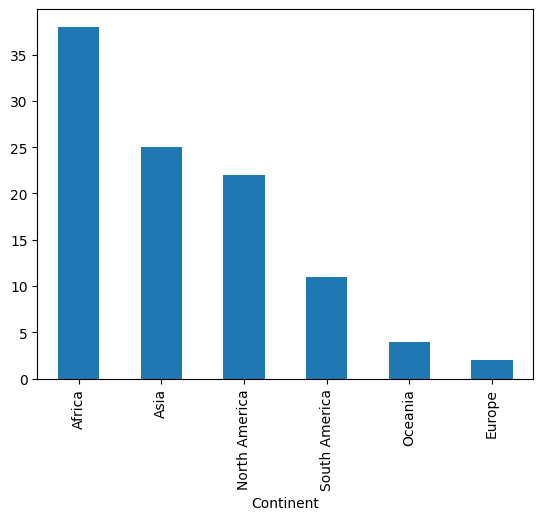

In [431]:
df["Continent"].value_counts().plot(kind = 'bar')
plt.show()

The bar chart shows the number of sugarcane-producing countries in each continent.
- Africa has the highest number of countries (38), followed by Asia (25) and North America (22).<br>
 - Europe has the least representation with only 2 countries.

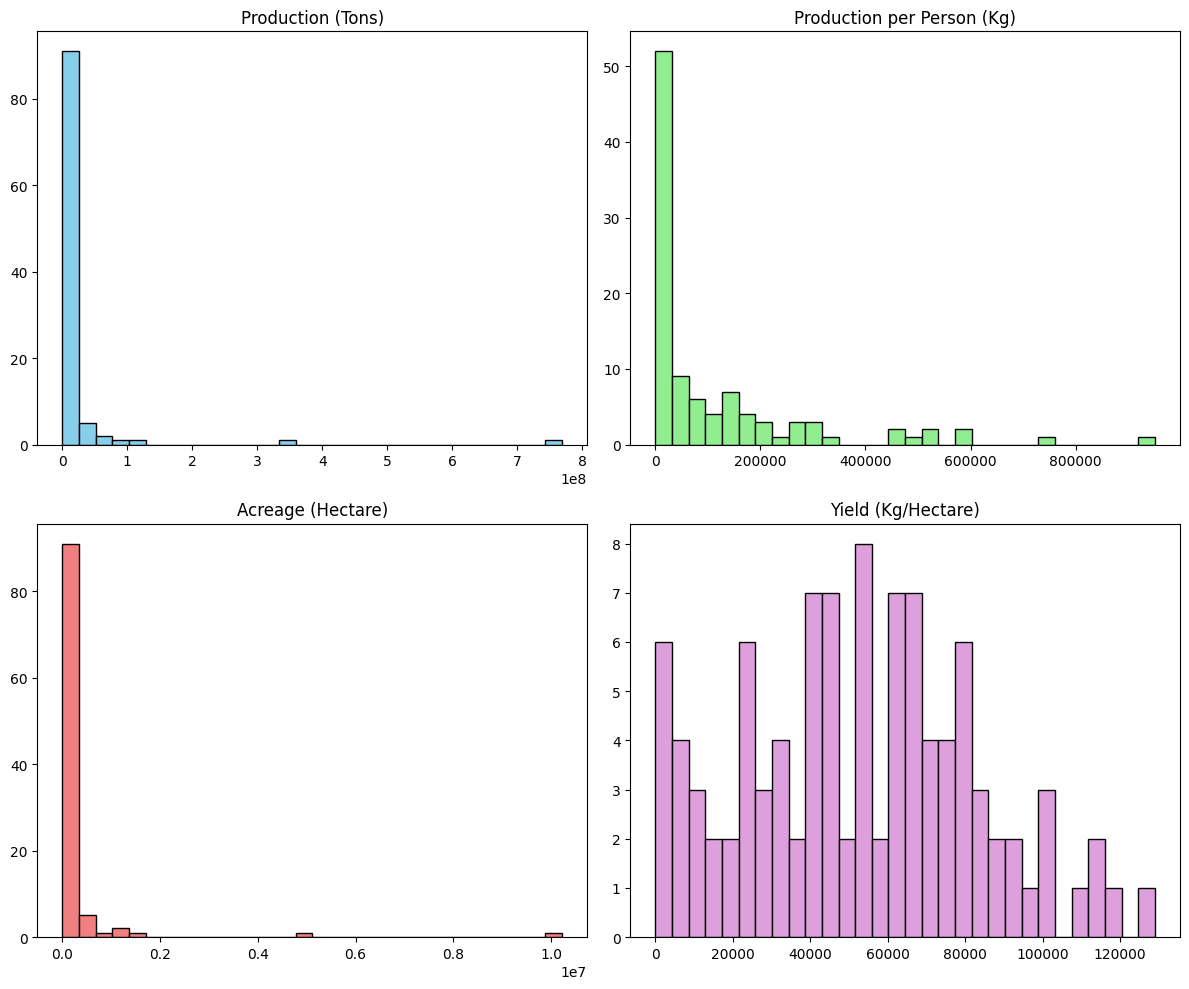

In [432]:
prod = df['Production(Tons)'].dropna()
ppp = df['Production_per_Person(Kg)'].dropna()
acre = df['Acreage(Hectare)'].dropna()
yield_ = df['Yield(Kg/Hectare)'].dropna()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each dataset with proper color argument
axes[0, 0].hist(prod, bins=30, color='skyblue', edgecolor='k')
axes[0, 0].set_title('Production (Tons)')

axes[0, 1].hist(ppp, bins=30, color='lightgreen', edgecolor='k')
axes[0, 1].set_title('Production per Person (Kg)')

axes[1, 0].hist(acre, bins=30, color='lightcoral', edgecolor='k')
axes[1, 0].set_title('Acreage (Hectare)')

axes[1, 1].hist(yield_, bins=30, color='plum', edgecolor='k')
axes[1, 1].set_title('Yield (Kg/Hectare)')

plt.tight_layout()
plt.show()


The histograms show the distribution of key numerical features.<br>
- Most countries have lower production and yield values, with a few outliers having extremely high numbers.<br>
- All features are right-skewed, indicating a small number of top-performing countries dominate the data.<br>
- Such skewness suggests the need for log scaling or normalization for deeper analysis.

In [433]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


The summary statistics highlight significant variation in production, acreage, and yield across countries.
- Maximum production is over 768 million tons, while the minimum is just 1 ton — indicating high skewness.
- The average production per person is ~112,952 Kg, with some countries producing up to 951,087 Kg/person.
- Yield (Kg/Hectare) ranges from as low as 10 to over 129,000, showing wide disparity in agricultural efficiency.
- Median values (50th percentile) show that more than half of the countries have much lower values than the mean, confirming the presence of outliers.


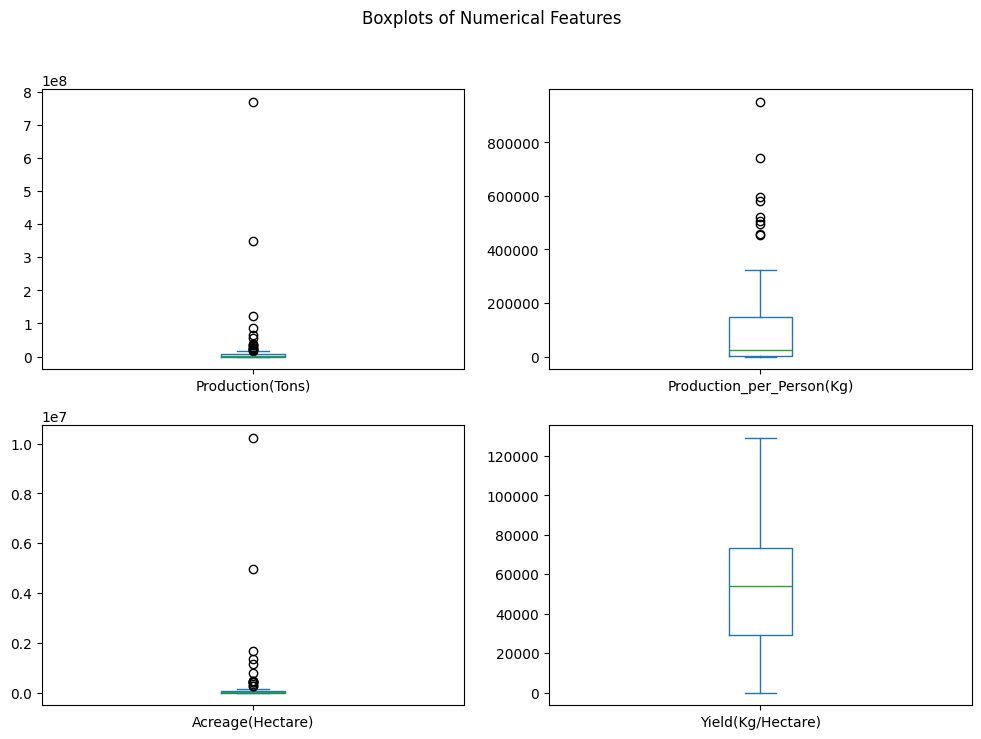

In [434]:
df[['Production(Tons)', 'Production_per_Person(Kg)', 
    'Acreage(Hectare)', 'Yield(Kg/Hectare)']].plot(kind='box', subplots=True, 
    layout=(2,2), figsize=(12,8), sharex=False, sharey=False)
plt.suptitle('Boxplots of Numerical Features')
plt.show()

# Bivariate Analysis

In [435]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### country which produces maximum sugarcane


In [436]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")

- A new dataframe `df_new` is created to focus on country-wise sugarcane production.
- The `Country` column is set as the index for easier visualization and analysis.

In [437]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


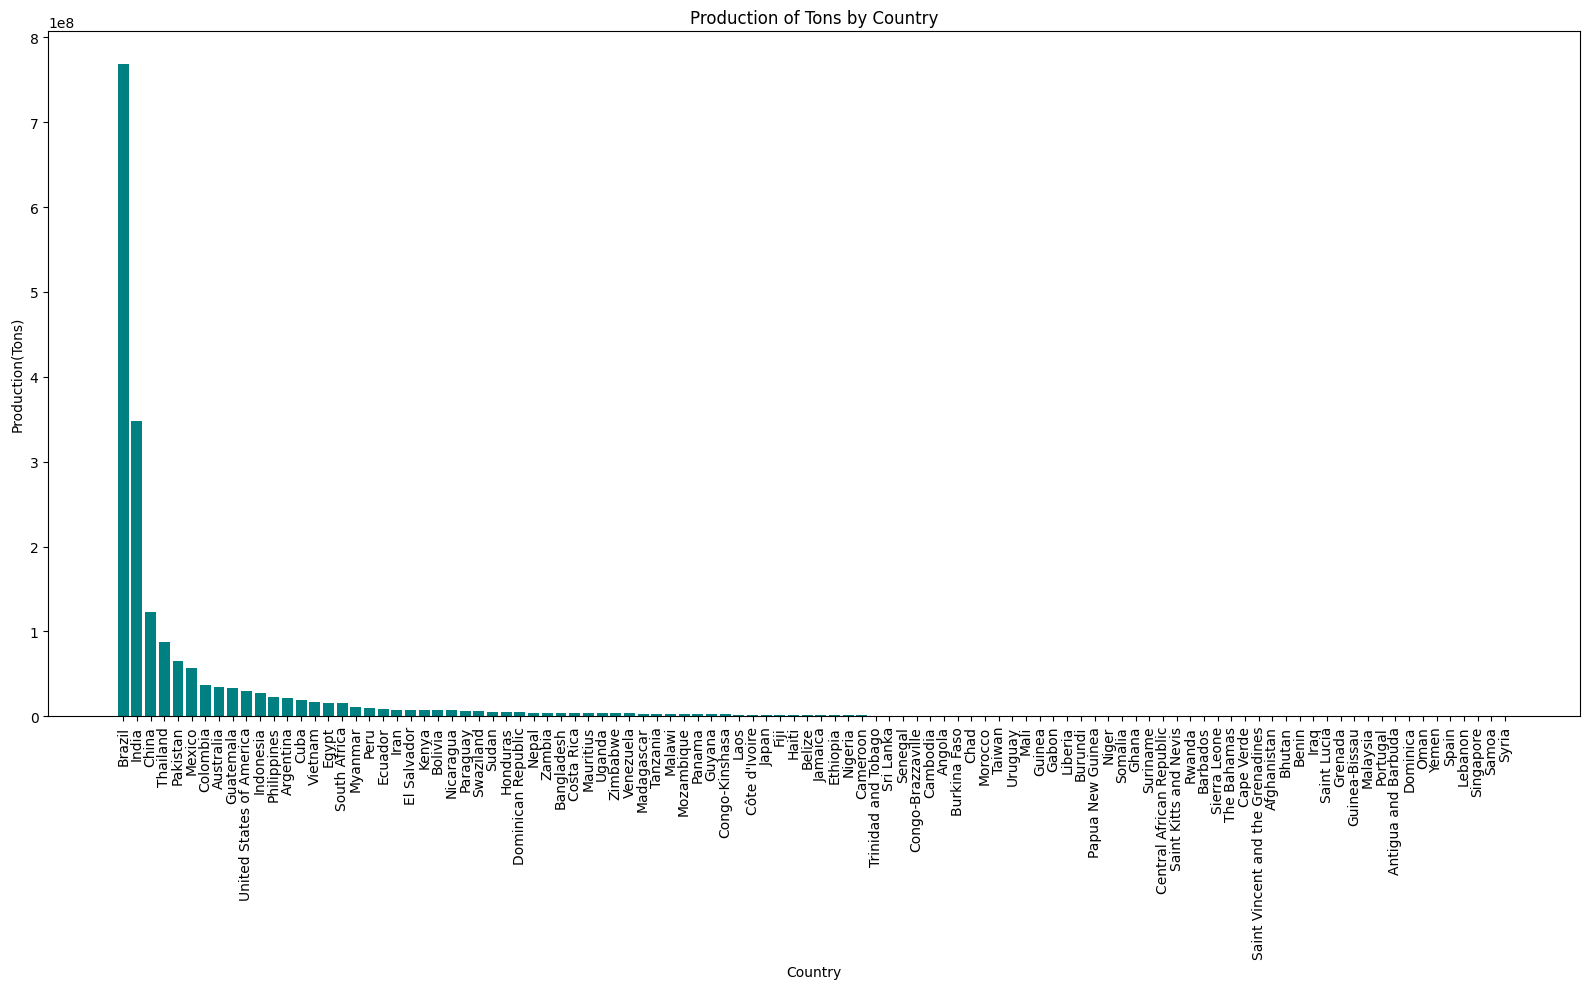

In [438]:
# bar plot of production by country
plt.figure(figsize=(16,10))
plt.bar(df['Country'], df['Production(Tons)'], color='teal')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Production(Tons)')
plt.title('Production of Tons by Country')
plt.tight_layout()
plt.show()

- The bar plot shows the sugarcane production (in tons) for each country.<br>
- Countries like Brazil and India dominate with significantly higher production.<br>
- The plot helps in visualizing the disparity in production levels across countries.<br>
- Due to the large number of countries, x-axis labels are rotated for clarity.


In [439]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

 - A new column `Production(Tons)_percent` is created to represent the percentage contribution of each country to total global sugarcane production.

In [440]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


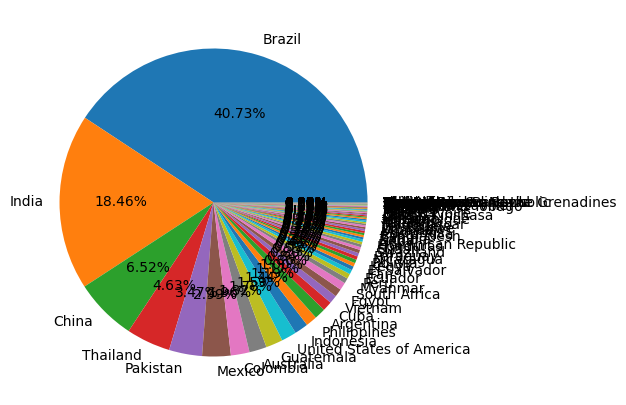

In [441]:
country = df["Country"]
production = df["Production(Tons)"]
fig = plt.figure(figsize=(5,5))
plt.pie(production, labels = country, autopct = '%2.2f%%')
plt.show()

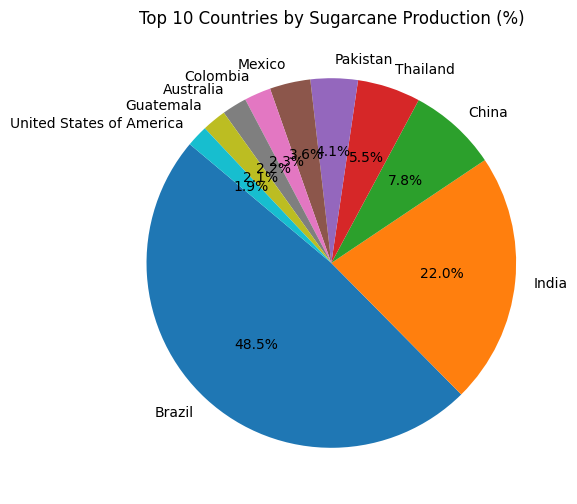

In [442]:
top10 = df.sort_values(by='Production(Tons)', ascending=False).head(10)
plt.figure(figsize=(6,6))
plt.pie(top10["Production(Tons)"], labels=top10["Country"], autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Countries by Sugarcane Production (%)")
plt.show()

- A pie chart was plotted to show the percentage contribution of the top 10 countries to global sugarcane production.<br>
- Brazil alone contributes over 40%, followed by India and China.<br>
- Using only top 10 countries makes the visualization clean and meaningful.<br>


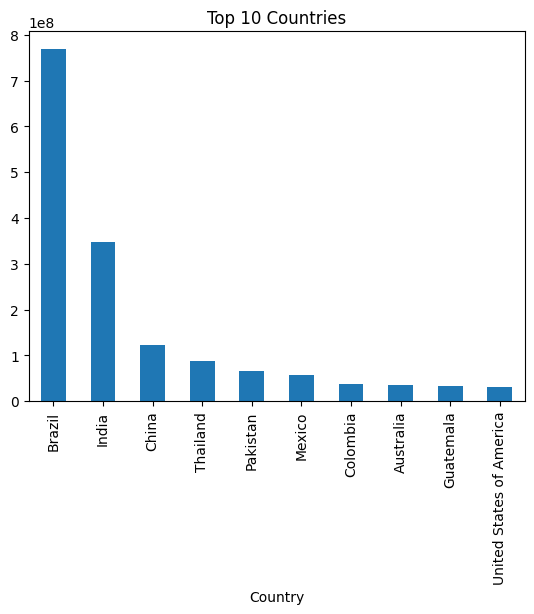

In [443]:
plt.title("Top 10 Countries")
df_new["Production(Tons)"].head(10).plot(kind = "bar")
plt.show()

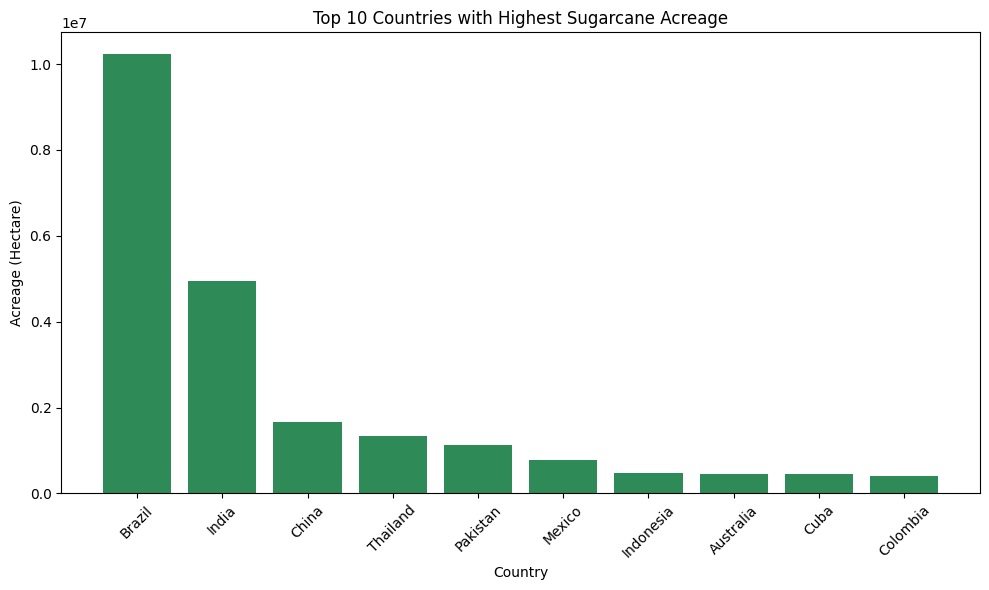

In [444]:
df_arc = df.sort_values("Acreage(Hectare)", ascending=False)
plt.figure(figsize=(10,6))
plt.bar(df_arc["Country"].head(10), df_arc["Acreage(Hectare)"].head(10), color='seagreen')
plt.title("Top 10 Countries with Highest Sugarcane Acreage")
plt.xlabel("Country")
plt.ylabel("Acreage (Hectare)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### correlation
##### value of correlation near 1 means these are totally correlated

In [445]:
df[['Production(Tons)', 'Production_per_Person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)']].corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


In [446]:
sns.heatmap(df[['Production(Tons)', 'Production_per_Person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)']].corr(), annot=True, cmap="Blues")

<Axes: >

#### do countries which yield more sugarcane per hectare produces more sugarcane in total? 
#### answer = no

In [447]:
x = df["Yield(Kg/Hectare)"]
y = df["Production(Tons)"]
plt.figure(figsize = (4,3))
plt.scatter(x,y, s=15, c='red', alpha = .6, edgecolors = 'white')

# Analysis for Continents

#### which continent produces maximum sugarcane?

In [448]:
df_continent = df.groupby("Continent").sum()

In [449]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


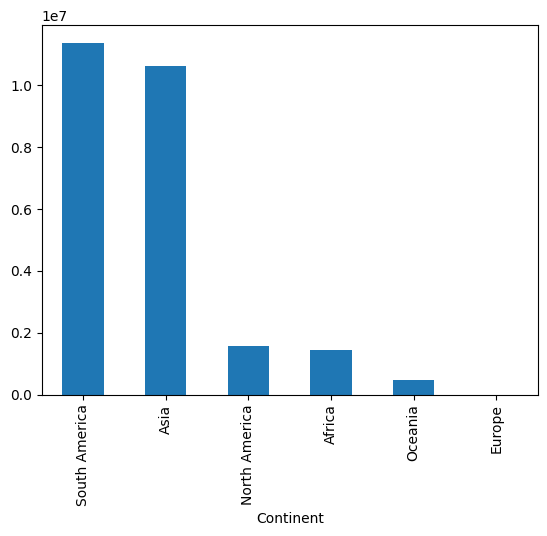

In [463]:
df_continent["Acreage(Hectare)"].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

### Do number of countries in continent effects production of sugarcane? 
#### insight : No!

In [464]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [465]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [466]:
df_continent.head()

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4


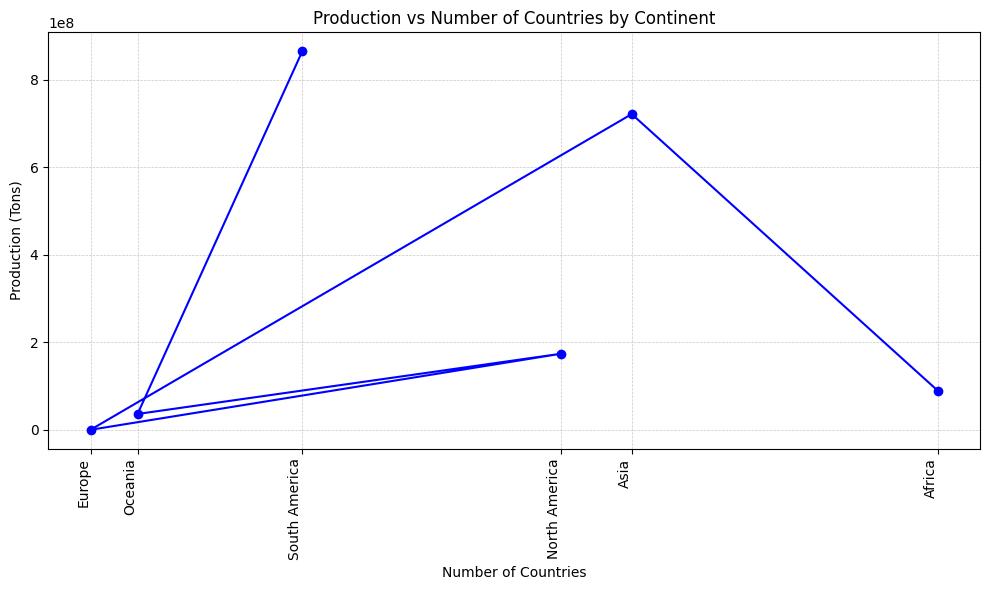

In [467]:
x = df_continent["number_of_countries"].values
y = df_continent["Production(Tons)"].values
labels = df_continent.index.to_list()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, marker='o', linestyle='-', color='blue')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, ha='right')

ax.set_xlabel("Number of Countries")
ax.set_ylabel("Production (Tons)")
ax.set_title("Production vs Number of Countries by Continent")

ax.grid(True, lw=0.5, ls='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Do continent with highest land produces more sugarcane?
#### insight : Yes!

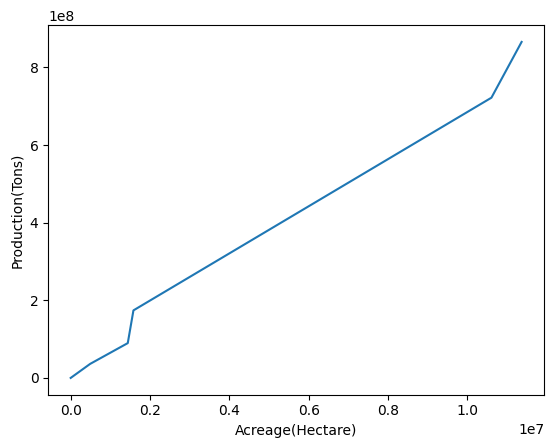

In [456]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )
plt.show()

### production distribution by continent

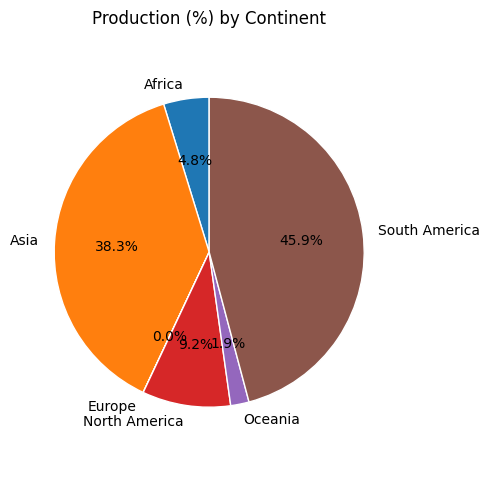

In [457]:
values = df_continent["Production(Tons)"].values
labels = df_continent.index.tolist()

plt.figure(figsize=(5, 5))
plt.pie(
    values,labels=labels,autopct='%1.1f%%',startangle=90,
    wedgeprops={'edgecolor':'white', 'linewidth':1})
plt.title("Production (%) by Continent")
plt.axis('equal')  # Ensures the pie is circular
plt.tight_layout()
plt.show()


### Correlation for continent

In [458]:
df_continent[['Production(Tons)', 'Production_per_Person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)', 'number_of_countries']].corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


## Pandas-Profiling

In [459]:
df1 = pd.read_csv("List of Countries by Sugarcane Production.csv")
report = ProfileReport(df1,title = " EDA Report On Sugarcane Production Dataset", explorative = True)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 186.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Choropleth Map – Global Sugarcane Production

- The interactive choropleth map shows sugarcane production distribution across the world.
- Countries with darker shades produce significantly more sugarcane.
- Brazil and India stand out as the largest producers globally.
- This map adds strong visual clarity and interactivity to the dataset.

In [460]:
import plotly.express as px
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Production(Tons)",
    hover_name="Country",
    color_continuous_scale="YlGn",
    title="Global Sugarcane Production by Country"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="Production (Tons)")
)

fig.show()
